In [1]:
import numpy as np
import pandas as pd


In [2]:
# Reading files stored in EC2 memory
#books_ratings = pd.read_csv('../ratings_Books.csv', header=None)

In [3]:
#books_ratings.columns = ['UserID','ItemID','rating','Timestamp']

In [4]:
#books_ratings.head(5)

In [5]:
pip install --upgrade pip 


The following command must be run outside of the IPython shell:

    $ pip install --upgrade pip 

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [6]:
# Reading json data files from S3 using lazyread
# import boto3
# from lazyreader import lazyread
# client = boto3.client('s3')
# s3_object = client.get_object(Bucket='santhoshi-sparkle', Key='amazon-data/s3-test.json')
# body = s3_object['Body']

# for doc in lazyread(body, delimiter=b'\n'):
#     print(doc)

In [7]:
import sys
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install lazyreader

Requirement already up-to-date: pip in /home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages (18.0)


In [8]:
!{sys.executable} -m pip install smart_open

In [9]:
from smart_open import smart_open

In [11]:
# Reding csv file from S3 and converting it into dataframe
#initial_df = pd.read_csv(smart_open('s3://santhoshi-sparkle/amazon-data/ratings_Clothing_Shoes_and_Jewelry.csv'), header = None)

In [8]:
#initial_df.columns = ['UserID','ItemID','rating','Timestamp']

In [9]:
#initial_df['Timestamp'] = pd.to_datetime(initial_df.Timestamp,unit='s')

In [25]:
#initial_df['new'] = initial_df['Timestamp'].dt.date
#initial_df.info()

In [26]:
#initial_df.head(5)
#new_df = initial_df.drop('Timestamp', axis = 1)

In [27]:
#reviews_df = initial_df.drop_duplicates(subset=['UserID', 'ItemID','Timestamp'],inplace=True)
#missings = new_df.isnull().sum()

In [28]:
# initial_df.shape
# missings

In [29]:
#new_df.head(10).T

In [17]:
# Reading meta_Clothing_Shoes_and_Jewelry data into   EC2 console
import json
import ast 
records = []
count = 1
for line in smart_open('s3://santhoshi-sparkle/amazon-data/meta_Clothing_Shoes_and_Jewelry.json'):
    mydict = ast.literal_eval(line.decode("utf-8"))
    count = count + 1
    records.append(mydict)
    if count > 1000000:
        break
 

In [20]:
#records

In [18]:
# Converting list of dictionaries to dataframe
meta_Clothing_Shoes_and_Jewelry_df = pd.DataFrame(records)

In [19]:
meta_Clothing_Shoes_and_Jewelry_df.head(5).T

,0,1,2,3,4
asin,0000037214,0000031887,0123456479,0456844570,0456808574
brand,Big Dreams,Boutique Cutie,NaN,NaN,NaN
categories,"[[Clothing, Shoes & Jewelry, Girls], [Clothing...","[[Clothing, Shoes & Jewelry, Girls, Clothing, ...","[[Clothing, Shoes & Jewelry, Novelty, Costumes...","[[Clothing, Shoes & Jewelry, Women, Accessorie...","[[Clothing, Shoes & Jewelry, Women, Accessorie..."
description,NaN,This adorable basic ballerina tutu is perfect ...,Elegance par excellence. Hand-crafted of the f...,NaN,NaN
imUrl,http://ecx.images-amazon.com/images/I/31mCncNu...,http://ecx.images-amazon.com/images/I/314qZjYe...,http://ecx.images-amazon.com/images/I/413tGhqo...,http://ecx.images-amazon.com/images/I/31QZTHxv...,http://ecx.images-amazon.com/images/I/31UsrgT5...
price,6.99,6.79,64.98,NaN,NaN
related,"{'also_viewed': ['B00JO8II76', 'B00DGN4R1Q', '...","{'also_bought': ['0000031852', '0000031895', '...","{'also_bought': ['B000BMTCK6', 'B0006JCGUM', '...","{'also_viewed': ['B008MTRT1O', 'B00BUG47S4', '...","{'also_viewed': ['B00A6JD8EA', 'B00BFL4FTA', '..."
salesRank,{'Clothing': 1233557},{'Sports &amp; Outdoors': 8547},{'Kitchen & Dining': 16987},{'Clothing': 1180499},{'Clothing': 1038084}
title,Purple Sequin Tiny Dancer Tutu Ballet Dance Fa...,Ballet Dress-Up Fairy Tutu,SHINING IMAGE HUGE PINK LEATHER JEWELRY BOX / ...,RiZ Women's Beautify Crafted &frac12; Rimmed F...,Lantin White Visor Wrap Around Ski Style Aviat...


In [20]:
meta_Clothing_Shoes_and_Jewelry_df.shape

(1000000, 9)

In [21]:
#Writing dataframes to csv and dump in S3 
import boto3
from io import StringIO

csv_buffer = StringIO()
meta_Clothing_Shoes_and_Jewelry_df.to_csv(csv_buffer)
s3_resource = boto3.resource('s3')
s3_resource.Object('santhoshi-sparkle', 'amazon-data/meta_Clothing_Shoes_and_Jewelry_df.csv').put(Body=csv_buffer.getvalue())

{'ResponseMetadata': {'RequestId': 'F20FCDE75999264D',
  'HostId': 'B4DfPTKLPkPY8BfeubbQK3Ywv9lTPzy6G7WUbZ9X0/ZTkBChAwPQb6qtAUWkKV87u3ubNNjPnW8=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'B4DfPTKLPkPY8BfeubbQK3Ywv9lTPzy6G7WUbZ9X0/ZTkBChAwPQb6qtAUWkKV87u3ubNNjPnW8=',
   'x-amz-request-id': 'F20FCDE75999264D',
   'date': 'Sat, 04 Aug 2018 18:02:09 GMT',
   'etag': '"63b8691ee8c3c9d7c6b4fcb2e4df4f94"',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'ETag': '"63b8691ee8c3c9d7c6b4fcb2e4df4f94"'}

In [10]:
# Reading csv from S3
meta_Clothing_Shoes_and_Jewelry_df = pd.read_csv(smart_open('s3://santhoshi-sparkle/amazon-data/meta_Clothing_Shoes_and_Jewelry_df.csv'))

In [11]:
meta_Clothing_Shoes_and_Jewelry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
Unnamed: 0     1000000 non-null int64
asin           1000000 non-null object
brand          70961 non-null object
categories     1000000 non-null object
description    66255 non-null object
imUrl          999923 non-null object
price          344625 non-null float64
related        622429 non-null object
salesRank      941910 non-null object
title          999396 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 76.3+ MB


In [12]:
#meta_reviews_df = meta_Clothing_Shoes_and_Jewelry_df.drop_duplicates(subset=['UserID', 'ItemID','Timestamp'],inplace=True)
## We use meta data for Content-based filtering

In [13]:
meta_Clothing_Shoes_and_Jewelry_df.head(5).T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
asin,0000037214,0000031887,0123456479,0456844570,0456808574
brand,Big Dreams,Boutique Cutie,NaN,NaN,NaN
categories,"[['Clothing, Shoes & Jewelry', 'Girls'], ['Clo...","[['Clothing, Shoes & Jewelry', 'Girls', 'Cloth...","[['Clothing, Shoes & Jewelry', 'Novelty, Costu...","[['Clothing, Shoes & Jewelry', 'Women', 'Acces...","[['Clothing, Shoes & Jewelry', 'Women', 'Acces..."
description,NaN,This adorable basic ballerina tutu is perfect ...,Elegance par excellence. Hand-crafted of the f...,NaN,NaN
imUrl,http://ecx.images-amazon.com/images/I/31mCncNu...,http://ecx.images-amazon.com/images/I/314qZjYe...,http://ecx.images-amazon.com/images/I/413tGhqo...,http://ecx.images-amazon.com/images/I/31QZTHxv...,http://ecx.images-amazon.com/images/I/31UsrgT5...
price,6.99,6.79,64.98,NaN,NaN
related,"{'also_viewed': ['B00JO8II76', 'B00DGN4R1Q', '...","{'also_bought': ['0000031852', '0000031895', '...","{'also_bought': ['B000BMTCK6', 'B0006JCGUM', '...","{'also_viewed': ['B008MTRT1O', 'B00BUG47S4', '...","{'also_viewed': ['B00A6JD8EA', 'B00BFL4FTA', '..."
salesRank,{'Clothing': 1233557},{'Sports &amp; Outdoors': 8547},{'Kitchen & Dining': 16987},{'Clothing': 1180499},{'Clothing': 1038084}
title,Purple Sequin Tiny Dancer Tutu Ballet Dance Fa...,Ballet Dress-Up Fairy Tutu,SHINING IMAGE HUGE PINK LEATHER JEWELRY BOX / ...,RiZ Women's Beautify Crafted &frac12; Rimmed F...,Lantin White Visor Wrap Around Ski Style Aviat...


In [7]:
# Reading reviews_Clothing_Shoes_and_Jewelry data into   EC2 console
import json
import ast 
records1 = []
count = 1
for line in smart_open('s3://santhoshi-sparkle/amazon-data/reviews_Clothing_Shoes_and_Jewelry.json'):
    mydict = ast.literal_eval(line.decode("utf-8"))
    count = count + 1
    records1.append(mydict)
    if count > 1000000:
        break

In [25]:
#records1

In [6]:
reviews_Clothing_Shoes_and_Jewelry_df = pd.DataFrame(records1)

NameError: name 'records1' is not defined

In [37]:
reviews_Clothing_Shoes_and_Jewelry_df.head(5).T

,0,1,2,3,4
asin,0000031887,0000031887,0000031887,0000031887,0000031887
helpful,"[0, 0]","[1, 1]","[1, 1]","[0, 1]","[0, 0]"
overall,5,4,2,1,4
reviewText,Perfect red tutu for the price. I baught it as...,This was a really cute tutu the only problem i...,the tutu color was very nice. the only issue w...,My 3-yr-old daughter received this as a gift f...,Bought it for my daughters first birthday whic...
reviewTime,"11 4, 2013","05 26, 2012","02 17, 2013","03 21, 2013","01 23, 2014"
reviewerID,A2XVJBSRI3SWDI,A2G0LNLN79Q6HR,A2R3K1KX09QBYP,A19PBP93OF896,A1P0IHU93EF9ZK
reviewerName,abigail,"aj_18 ""Aj_18""",alert consumer,"Alinna Satake ""Can't Stop Eating""",Amanda
summary,Nice tutu,Really Cute but rather short.,not very good material.,Tiny and Poorly Constructed!,i love it
unixReviewTime,1383523200,1337990400,1361059200,1363824000,1390435200


In [41]:
reviews_Clothing_Shoes_and_Jewelry_df.shape

(1000000, 9)

In [42]:
#Writing dataframes to csv and dump in S3 
import boto3
from io import StringIO

csv_buffer = StringIO()
reviews_Clothing_Shoes_and_Jewelry_df.to_csv(csv_buffer)
s3_resource = boto3.resource('s3')
s3_resource.Object('santhoshi-sparkle', 'amazon-data/reviews_Clothing_Shoes_and_Jewelry_df.csv').put(Body=csv_buffer.getvalue())

{'ResponseMetadata': {'RequestId': '22F6023C07B3221F',
  'HostId': 'tF0b6QnF2jmJz/XnN5l4Kd7AOgThUH8Zgcz+rRs3TDwkaAdxRjHZRxGPp7SKXiAcYUPPNFm3rTA=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'tF0b6QnF2jmJz/XnN5l4Kd7AOgThUH8Zgcz+rRs3TDwkaAdxRjHZRxGPp7SKXiAcYUPPNFm3rTA=',
   'x-amz-request-id': '22F6023C07B3221F',
   'date': 'Sat, 04 Aug 2018 18:14:42 GMT',
   'etag': '"4cce81e697b6be2a3236b26284ae0360"',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'ETag': '"4cce81e697b6be2a3236b26284ae0360"'}

In [27]:
reviews_Clothing_Shoes_and_Jewelry_df = pd.read_csv(smart_open('s3://santhoshi-sparkle/amazon-data/reviews_Clothing_Shoes_and_Jewelry_df.csv'))

In [33]:
reviews_Clothing_Shoes_and_Jewelry_df.head(4).T

,0,1,2,3
asin,0000031887,0000031887,0000031887,0000031887
helpful,"[0, 0]","[1, 1]","[1, 1]","[0, 1]"
overall,5,4,2,1
reviewText,Perfect red tutu for the price. I baught it as...,This was a really cute tutu the only problem i...,the tutu color was very nice. the only issue w...,My 3-yr-old daughter received this as a gift f...
reviewTime,"11 4, 2013","05 26, 2012","02 17, 2013","03 21, 2013"
reviewerID,A2XVJBSRI3SWDI,A2G0LNLN79Q6HR,A2R3K1KX09QBYP,A19PBP93OF896
reviewerName,abigail,"aj_18 ""Aj_18""",alert consumer,"Alinna Satake ""Can't Stop Eating"""
summary,Nice tutu,Really Cute but rather short.,not very good material.,Tiny and Poorly Constructed!
unixReviewTime,1383523200,1337990400,1361059200,1363824000


In [34]:
reviews_Clothing_Shoes_and_Jewelry_df.drop_duplicates(subset=['asin', 'reviewerID','unixReviewTime'],inplace=True)


In [37]:
reviews_Clothing_Shoes_and_Jewelry_df.shape

(1000000, 9)

In [36]:
reviews_Clothing_Shoes_and_Jewelry_df.drop('Unnamed: 0', axis = 1, inplace = True)

ValueError: labels ['Unnamed: 0'] not contained in axis

In [32]:
new = pd.DataFrame(reviews_Clothing_Shoes_and_Jewelry_df.helpful.values.tolist())

In [15]:
#reviews_Clothing_Shoes_and_Jewelry_df[['HelpfulN','HelpfulD']]

In [17]:
reviews_Clothing_Shoes_and_Jewelry_df.isnull().sum()

asin                 0
helpful              0
overall              0
reviewText         177
reviewTime           0
reviewerID           0
reviewerName      3378
summary              5
unixReviewTime       0
dtype: int64

In [18]:
#pd.DataFrame(reviews.helpful.values.tolist(), index = reviews.index)

In [14]:
# Split data into train and test
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install scipy
from sklearn.model_selection import train_test_split

In [20]:
X = reviews_Clothing_Shoes_and_Jewelry_df[['reviewerID', 'asin']]
y = reviews_Clothing_Shoes_and_Jewelry_df['overall']

In [16]:
X_trainX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [16]:
test_df = reviews_Clothing_Shoes_and_Jewelry_df.head(600)


In [17]:
#R_df = test_df.pivot(index = 'reviewerID', columns ='asin', values = 'overall').fillna(0)
R_df = test_df.pivot(index = 'reviewerID', columns ='asin', values = 'overall')

In [18]:
R_df_new = R_df.fillna(R_df.mean())
#R_df_new = R_df.fillna(0)

In [19]:
R_df_new.head(5)

asin,0000031887,0000037214,0123456479,0456787283,0456808574,0456830197,0456838384,0456840532,0456844570,0456856293,...,1608322130,1608322181,1608322262,1617160040,161716013X,1617160156,1617160199,1617160253,1617160318,1617160377
reviewerID,,,,,,,,,,,,,,,,,,,,,
A10J25J84YZG5L,4.224576,1.0,4.000000,1.0,5.0,2.0,5.0,1.0,4.0,5.0,...,3.666667,5.0,5.0,3.961538,4.0,4.857143,4.8,2.8,4.333333,4.238095
A11FP9FV8VTUID,4.224576,1.0,4.474359,1.0,5.0,2.0,5.0,1.0,4.0,5.0,...,3.666667,5.0,5.0,3.961538,4.0,4.857143,4.8,2.8,4.333333,4.238095
A11S1LDJ2DPWFA,4.224576,1.0,4.474359,1.0,5.0,2.0,5.0,1.0,4.0,5.0,...,3.666667,5.0,5.0,3.961538,4.0,4.857143,4.8,2.8,5.000000,4.238095
A11YX71I94TIJT,4.224576,1.0,4.474359,1.0,5.0,2.0,5.0,1.0,4.0,5.0,...,3.666667,5.0,5.0,3.961538,4.0,4.857143,4.8,2.8,4.333333,4.238095
A12GW7YBQG2ZBR,4.000000,1.0,4.474359,1.0,5.0,2.0,5.0,1.0,4.0,5.0,...,3.666667,5.0,5.0,3.961538,4.0,4.857143,4.8,2.8,4.333333,4.238095


In [20]:
R = R_df_new.as_matrix()
user_ratings_mean = np.mean(R, axis = 1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

#Obtain mean of columns as you need, nanmean is just convenient.
#col_mean = np.nanmean(R, axis=0)
#Find indicies that you need to replace

#inds = np.where(np.isnan(R))
#Place column means in the indices. Align the arrays using take
#R[inds] = np.take(col_mean, inds[1])

In [24]:
z = np.random.rand(4,3)

In [112]:
z

array([[0.84443627, 0.9035065 , 0.38674345],
       [0.19710785, 0.74909423, 0.46425397],
       [0.48221074, 0.31139127, 0.47243928],
       [0.21360998, 0.80224328, 0.83300306]])

In [113]:
f = np.mean(z, axis = 1)
f

array([0.71156207, 0.47015202, 0.42201376, 0.61628544])

In [114]:
d = f.reshape(-1, 1)
d

array([[0.71156207],
       [0.47015202],
       [0.42201376],
       [0.61628544]])

In [115]:
z - d

array([[ 0.13287419,  0.19194443, -0.32481862],
       [-0.27304417,  0.27894222, -0.00589805],
       [ 0.06019698, -0.11062249,  0.05042552],
       [-0.40267546,  0.18595784,  0.21671762]])

In [91]:
R_demeaned[0:2]


array([[0., 0., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]])

In [96]:
user_ratings_mean.shape
#user_ratings_mean.reshape(-1, 1)

(595,)

# SGD + Funk SVD Algorithm implementation

In [30]:
R_a = np.array(R_demeaned)
N = len(R_a)
M = len(R_a[0])
K = 50
P = np.random.rand(N,K)
Q = np.random.rand(M,K)


In [31]:
def SGD_FunkSVD(R_a, P, Q, K, steps=50, alpha=0.0002, beta=0.02):
    Q = Q.T
#     def get_error(R_a, P, Q):
#         # This calculates the MSE of nonzero elements
#         return np.sum((R_a - np.dot(P, Q)) ** 2) / np.sum(len(R_a), len(R_a[0]))
    
    #MSE_List = []
    for step in range(0, steps):
        for i in range(0, len(R_a)):
            for j in range(0, len(R_a[i])):
                eij = R_a[i][j] - np.dot(P[i,:],Q[:,j])
#                 eij = R_a[i][j] - (np.dot(P[i,:],Q[:,j]) + user_ratings_mean.reshape(-1, 1)[i])

                for k in range(0, K):
                    P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                    Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
                    
        eR = np.dot(P,Q)
        #MSE_List.append(get_error(R_a, P, Q))
        e = 0
        for i in range(0, len(R_a)):
            for j in range(0, len(R_a[i])):
                if R_a[i][j] > 0:
                    e = e + pow(R_a[i][j] - np.dot(P[i,:],Q[:,j]), 2)
                    for k in range(0, K):
                        e = e + (beta/2) * (pow(P[i][k],2) + pow(Q[k][j],2))
            
                        
            if e < 0.001:
                break
    return P, Q.T 

In [32]:
nP, nQ = SGD_FunkSVD(R_a, P, Q, K)
#nR = np.dot(nP, nQ.T) + user_ratings_mean.reshape(-1, 1)

In [33]:
nR = np.dot(nP, nQ.T) + user_ratings_mean.reshape(-1, 1)
#nR = np.dot(nP, nQ.T) 

In [34]:
preds_df = pd.DataFrame(nR, columns = R_df.columns)


In [35]:
preds_df.head(5)

asin,0000031887,0000037214,0123456479,0456787283,0456808574,0456830197,0456838384,0456840532,0456844570,0456856293,...,1608322130,1608322181,1608322262,1617160040,161716013X,1617160156,1617160199,1617160253,1617160318,1617160377
0,4.392271,1.229853,4.107475,1.482399,4.705907,2.315666,4.836090,1.363133,4.094656,5.013556,...,3.320387,4.921955,4.904655,3.854796,3.971733,4.523893,4.678905,2.861073,4.203588,4.303204
1,4.067402,1.631471,4.296202,1.715817,4.699795,2.207355,4.639769,1.569444,3.816111,4.766409,...,3.705592,5.053443,4.495874,3.763885,4.124265,4.430563,4.831900,3.368397,4.483153,4.256617
2,4.163244,1.746771,4.272362,1.749701,4.726538,2.765619,4.520932,1.554003,4.020823,4.583209,...,3.715548,4.741197,4.589357,3.958604,3.864372,4.967491,4.372222,3.258321,4.499325,4.236632
3,4.428516,1.131145,4.642932,1.441455,4.799120,1.976869,4.744449,1.252221,4.092729,5.028245,...,3.983213,4.907629,4.936525,3.585041,4.143010,4.624360,4.680160,2.555361,3.840905,3.803775
4,4.080000,1.227501,4.248124,1.359757,4.618620,2.533232,4.830255,1.350435,4.007771,5.006325,...,3.554543,4.981046,4.824050,4.049059,3.808378,4.875305,4.550065,3.031070,4.507839,4.159685


In [14]:
#preds_df.max()

# ALS Algorithm Implementation

In [33]:
## ALS Algorithm
import matplotlib.pyplot as plt

In [44]:
## ALS + SVD algorithm
R_df_new = R_df.fillna(0)
R = R_df_new.as_matrix()
n = len(R)
m = len(R[0])
K = 3

G = R>0.5
G[G == True] = 1
G[G == False] = 0
G= G.astype(np.float64, copy=False)
P = 5 * np.random.rand(n, K)
Q = 5 * np.random.rand(K, m)


array([[1.32035856, 2.15648234, 3.06213213],
       [3.03008702, 4.63266262, 0.13444599]])

In [45]:
# ALS algorithm

def ALS(R, G, P, Q, K = 3, steps = 50, lambda_ = 0.1):


    def get_error(R, P, Q, G):
        # This calculates the MSE of nonzero elements
        return np.sum((G * (R - np.dot(P, Q))) ** 2) / np.sum(G)

    MSE_List = []


    for iter in range(steps):
        for i, Gi in enumerate(G):
            P[i] = np.linalg.solve(np.dot(Q, np.dot(np.diag(Gi), Q.T)) + lambda_ * np.eye(K),
                                       np.dot(Q, np.dot(np.diag(Gi), R[i].T))).T
        

        for j, Gj in enumerate(G.T):
            Q[:,j] = np.linalg.solve(np.dot(P.T, np.dot(np.diag(Gj), P)) + lambda_ * np.eye(K),
                                     np.dot(P.T, np.dot(np.diag(Gj), R[:, j])))
        

        MSE_List.append(get_error(R, P, Q, G))
        
    
    print(MSE_List)
    return P, Q

[0.018477125125370034, 0.009084275766462696, 0.0064737603294006026, 0.0050214813356207755, 0.004100286877711428, 0.0034681089606010897, 0.0030102596505141785, 0.0026652927770561777, 0.002397362977494973, 0.0021841918734417922, 0.002011232606786148, 0.0018686019193130466, 0.0017493616372016014, 0.001648505317321018, 0.0015623347302820116, 0.0014880621770506483, 0.0014235489091105765, 0.0013671284055312546, 0.001317484139296581, 0.0012735632514351387, 0.0012345144385861343, 0.0011996425079936, 0.0011683746207264327, 0.0011402348707394386, 0.0011148249009828523, 0.0010918089536311024, 0.001070902219397946, 0.0010518616707405229, 0.0010344787857323923, 0.00101857372563451, 0.0010039906406357664, 0.0009905938586962355, 0.0009782647711963025, 0.0009668992724795668, 0.0009564056427325201, 0.0009467027879987514, 0.0009377187696234524, 0.0009293895695871207, 0.0009216580491179355, 0.0009144730664677436, 0.0009077887263852036, 0.0009015637390552243, 0.0008957608704219228, 0.0008903464691169274, 

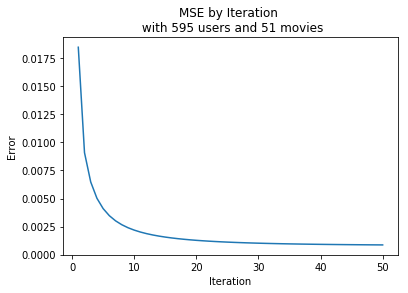

In [46]:
U, V = ALS(R, G, P, Q, 3, 50, 0.1)

In [47]:
R_result = np.dot(U, V)

In [48]:
Als_preds_df = pd.DataFrame(R_result, columns = R_df.columns)

In [38]:
#Als_preds_df.max()

In [37]:
## Content - Based Filtering
# We use meta data along with reviews data for content - based filtering

In [15]:
meta_Clothing_Shoes_and_Jewelry_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [16]:
meta_Clothing_Shoes_and_Jewelry_df.head(5).T

,0,1,2,3,4
asin,0000037214,0000031887,0123456479,0456844570,0456808574
brand,Big Dreams,Boutique Cutie,NaN,NaN,NaN
categories,"[['Clothing, Shoes & Jewelry', 'Girls'], ['Clo...","[['Clothing, Shoes & Jewelry', 'Girls', 'Cloth...","[['Clothing, Shoes & Jewelry', 'Novelty, Costu...","[['Clothing, Shoes & Jewelry', 'Women', 'Acces...","[['Clothing, Shoes & Jewelry', 'Women', 'Acces..."
description,NaN,This adorable basic ballerina tutu is perfect ...,Elegance par excellence. Hand-crafted of the f...,NaN,NaN
imUrl,http://ecx.images-amazon.com/images/I/31mCncNu...,http://ecx.images-amazon.com/images/I/314qZjYe...,http://ecx.images-amazon.com/images/I/413tGhqo...,http://ecx.images-amazon.com/images/I/31QZTHxv...,http://ecx.images-amazon.com/images/I/31UsrgT5...
price,6.99,6.79,64.98,NaN,NaN
related,"{'also_viewed': ['B00JO8II76', 'B00DGN4R1Q', '...","{'also_bought': ['0000031852', '0000031895', '...","{'also_bought': ['B000BMTCK6', 'B0006JCGUM', '...","{'also_viewed': ['B008MTRT1O', 'B00BUG47S4', '...","{'also_viewed': ['B00A6JD8EA', 'B00BFL4FTA', '..."
salesRank,{'Clothing': 1233557},{'Sports &amp; Outdoors': 8547},{'Kitchen & Dining': 16987},{'Clothing': 1180499},{'Clothing': 1038084}
title,Purple Sequin Tiny Dancer Tutu Ballet Dance Fa...,Ballet Dress-Up Fairy Tutu,SHINING IMAGE HUGE PINK LEATHER JEWELRY BOX / ...,RiZ Women's Beautify Crafted &frac12; Rimmed F...,Lantin White Visor Wrap Around Ski Style Aviat...


In [17]:
meta_Clothing_Shoes_and_Jewelry_df.drop_duplicates(subset=['asin'],inplace=True)


In [18]:
meta_Clothing_Shoes_and_Jewelry_df.isnull().sum()

asin                0
brand          929039
categories          0
description    933745
imUrl              77
price          655375
related        377571
salesRank       58090
title             604
dtype: int64

In [239]:
meta_Clothing_Shoes_and_Jewelry_df['description'].head(5)

0                                                     
1    This adorable basic ballerina tutu is perfect ...
2    Elegance par excellence. Hand-crafted of the f...
3                                                     
4                                                     
Name: description, dtype: object

# Basic Content based Filtering model:

In [20]:
# Split data into train and test
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install scipy
from sklearn.model_selection import train_test_split

In [21]:
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install ast
!{sys.executable} -m pip install nltk

  Using cached https://files.pythonhosted.org/packages/4b/fb/2b954d2a38c9a0ef1da6a46737a75b4dbf6f60e5dad0f267a4ec5ece20de/AST-0.0.2.tar.gz
    Complete output from command python setup.py egg_info:
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "/tmp/pip-install-7i05guew/ast/setup.py", line 6, in <module>
        README = codecs.open(os.path.join(here, 'AST/README'), encoding='utf8').read()
      File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/codecs.py", line 897, in open
        file = builtins.open(filename, mode, buffering)
    FileNotFoundError: [Errno 2] No such file or directory: '/tmp/pip-install-7i05guew/ast/AST/README'
    
    ----------------------------------------
Command "python setup.py egg_info" failed with error code 1 in /tmp/pip-install-7i05guew/ast/


In [22]:
import seaborn as sns
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

In [23]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer 

In [24]:
#reviews_Clothing_Shoes_and_Jewelry_df.drop_duplicates(subset=['asin', 'reviewerID','unixReviewTime'],inplace=True) 

In [25]:
meta_Clothing_Shoes_and_Jewelry_df.head(5).T

,0,1,2,3,4
asin,0000037214,0000031887,0123456479,0456844570,0456808574
brand,Big Dreams,Boutique Cutie,NaN,NaN,NaN
categories,"[['Clothing, Shoes & Jewelry', 'Girls'], ['Clo...","[['Clothing, Shoes & Jewelry', 'Girls', 'Cloth...","[['Clothing, Shoes & Jewelry', 'Novelty, Costu...","[['Clothing, Shoes & Jewelry', 'Women', 'Acces...","[['Clothing, Shoes & Jewelry', 'Women', 'Acces..."
description,NaN,This adorable basic ballerina tutu is perfect ...,Elegance par excellence. Hand-crafted of the f...,NaN,NaN
imUrl,http://ecx.images-amazon.com/images/I/31mCncNu...,http://ecx.images-amazon.com/images/I/314qZjYe...,http://ecx.images-amazon.com/images/I/413tGhqo...,http://ecx.images-amazon.com/images/I/31QZTHxv...,http://ecx.images-amazon.com/images/I/31UsrgT5...
price,6.99,6.79,64.98,NaN,NaN
related,"{'also_viewed': ['B00JO8II76', 'B00DGN4R1Q', '...","{'also_bought': ['0000031852', '0000031895', '...","{'also_bought': ['B000BMTCK6', 'B0006JCGUM', '...","{'also_viewed': ['B008MTRT1O', 'B00BUG47S4', '...","{'also_viewed': ['B00A6JD8EA', 'B00BFL4FTA', '..."
salesRank,{'Clothing': 1233557},{'Sports &amp; Outdoors': 8547},{'Kitchen & Dining': 16987},{'Clothing': 1180499},{'Clothing': 1038084}
title,Purple Sequin Tiny Dancer Tutu Ballet Dance Fa...,Ballet Dress-Up Fairy Tutu,SHINING IMAGE HUGE PINK LEATHER JEWELRY BOX / ...,RiZ Women's Beautify Crafted &frac12; Rimmed F...,Lantin White Visor Wrap Around Ski Style Aviat...


In [ ]:
# Product description based recommender

In [26]:
meta_Clothing_Shoes_and_Jewelry_df['description'] = meta_Clothing_Shoes_and_Jewelry_df['description'].fillna('')

In [27]:
new_df = meta_Clothing_Shoes_and_Jewelry_df.head(600)

In [28]:
new_df.shape

(600, 9)

In [29]:
new_df.head(5)

,asin,brand,categories,description,imUrl,price,related,salesRank,title
0,0000037214,Big Dreams,"[['Clothing, Shoes & Jewelry', 'Girls'], ['Clo...",,http://ecx.images-amazon.com/images/I/31mCncNu...,6.99,"{'also_viewed': ['B00JO8II76', 'B00DGN4R1Q', '...",{'Clothing': 1233557},Purple Sequin Tiny Dancer Tutu Ballet Dance Fa...
1,0000031887,Boutique Cutie,"[['Clothing, Shoes & Jewelry', 'Girls', 'Cloth...",This adorable basic ballerina tutu is perfect ...,http://ecx.images-amazon.com/images/I/314qZjYe...,6.79,"{'also_bought': ['0000031852', '0000031895', '...",{'Sports &amp; Outdoors': 8547},Ballet Dress-Up Fairy Tutu
2,0123456479,NaN,"[['Clothing, Shoes & Jewelry', 'Novelty, Costu...",Elegance par excellence. Hand-crafted of the f...,http://ecx.images-amazon.com/images/I/413tGhqo...,64.98,"{'also_bought': ['B000BMTCK6', 'B0006JCGUM', '...",{'Kitchen & Dining': 16987},SHINING IMAGE HUGE PINK LEATHER JEWELRY BOX / ...
3,0456844570,NaN,"[['Clothing, Shoes & Jewelry', 'Women', 'Acces...",,http://ecx.images-amazon.com/images/I/31QZTHxv...,NaN,"{'also_viewed': ['B008MTRT1O', 'B00BUG47S4', '...",{'Clothing': 1180499},RiZ Women's Beautify Crafted &frac12; Rimmed F...
4,0456808574,NaN,"[['Clothing, Shoes & Jewelry', 'Women', 'Acces...",,http://ecx.images-amazon.com/images/I/31UsrgT5...,NaN,"{'also_viewed': ['B00A6JD8EA', 'B00BFL4FTA', '...",{'Clothing': 1038084},Lantin White Visor Wrap Around Ski Style Aviat...


In [30]:
#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tf_idf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf_idf.fit_transform(new_df['description'])

In [31]:
tfidf_matrix.shape

(600, 10866)

In [32]:
# Since we have used TF-IDF Vectorizer, calculating the Dot Product will directly give us the Cosine Similarity Score. 
#Therefore, we will use sklearn's linear_kernel instead of cosine_similarities since it is much faster.

In [33]:
cosine_similarity = linear_kernel(tfidf_matrix, tfidf_matrix)

In [34]:
# We now have a pairwise cosine similarity matrix for all the products in our dataset. 
#The next step is to write a function that returns the 10 most similar products based on the cosine similarity score.

In [35]:
new_df  =  new_df.reset_index()
titles = new_df['title']
prod_id  = new_df['asin']
#indices = pd.Series(new_df.index, index=new_df['title'])
new_df.head(5)


,index,asin,brand,categories,description,imUrl,price,related,salesRank,title
0,0,0000037214,Big Dreams,"[['Clothing, Shoes & Jewelry', 'Girls'], ['Clo...",,http://ecx.images-amazon.com/images/I/31mCncNu...,6.99,"{'also_viewed': ['B00JO8II76', 'B00DGN4R1Q', '...",{'Clothing': 1233557},Purple Sequin Tiny Dancer Tutu Ballet Dance Fa...
1,1,0000031887,Boutique Cutie,"[['Clothing, Shoes & Jewelry', 'Girls', 'Cloth...",This adorable basic ballerina tutu is perfect ...,http://ecx.images-amazon.com/images/I/314qZjYe...,6.79,"{'also_bought': ['0000031852', '0000031895', '...",{'Sports &amp; Outdoors': 8547},Ballet Dress-Up Fairy Tutu
2,2,0123456479,NaN,"[['Clothing, Shoes & Jewelry', 'Novelty, Costu...",Elegance par excellence. Hand-crafted of the f...,http://ecx.images-amazon.com/images/I/413tGhqo...,64.98,"{'also_bought': ['B000BMTCK6', 'B0006JCGUM', '...",{'Kitchen & Dining': 16987},SHINING IMAGE HUGE PINK LEATHER JEWELRY BOX / ...
3,3,0456844570,NaN,"[['Clothing, Shoes & Jewelry', 'Women', 'Acces...",,http://ecx.images-amazon.com/images/I/31QZTHxv...,NaN,"{'also_viewed': ['B008MTRT1O', 'B00BUG47S4', '...",{'Clothing': 1180499},RiZ Women's Beautify Crafted &frac12; Rimmed F...
4,4,0456808574,NaN,"[['Clothing, Shoes & Jewelry', 'Women', 'Acces...",,http://ecx.images-amazon.com/images/I/31UsrgT5...,NaN,"{'also_viewed': ['B00A6JD8EA', 'B00BFL4FTA', '...",{'Clothing': 1038084},Lantin White Visor Wrap Around Ski Style Aviat...


"'"

In [39]:
new_df.shape

(600, 10)

In [40]:
indices = pd.Series(new_df.index, index=new_df['title'])

In [41]:

# recommend 10 most similar products
def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_similarity[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    product_indices = [i[0] for i in sim_scores]
    return category.iloc[product_indices]

In [44]:
get_recommendations('Ballet Dress-Up Fairy Tutu')

211    [['Clothing, Shoes & Jewelry', 'Novelty, Costu...
74     [['Clothing, Shoes & Jewelry', 'Women', 'Watch...
367    [['Clothing, Shoes & Jewelry', 'Novelty, Costu...
17     [['Clothing, Shoes & Jewelry', 'Novelty, Costu...
25     [['Clothing, Shoes & Jewelry', 'Men', 'Watches...
28     [['Clothing, Shoes & Jewelry', 'Men', 'Watches...
375    [['Clothing, Shoes & Jewelry', 'Novelty, Costu...
82     [['Clothing, Shoes & Jewelry', 'Men', 'Watches...
280    [['Clothing, Shoes & Jewelry', 'Novelty, Costu...
114    [['Clothing, Shoes & Jewelry', 'Novelty, Costu...
Name: categories, dtype: object

In [70]:
#reviews_Clothing_Shoes_and_Jewelry_df.head(5).T

In [82]:
meta_Clothing_Shoes_and_Jewelry_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
asin           1000000 non-null object
brand          70961 non-null object
categories     1000000 non-null object
description    1000000 non-null object
imUrl          999923 non-null object
price          344625 non-null float64
related        622429 non-null object
salesRank      941910 non-null object
title          999396 non-null object
dtypes: float64(1), object(8)
memory usage: 76.3+ MB


# Work in Progress: In the process of building better content based filtering using Categories field in meta data:

In [59]:
new_df['categories'] = new_df['categories'].apply(literal_eval)

In [165]:
category = new_df['categories']


In [238]:
category2 = category[0:3]

In [134]:
flat_list = [item for sublist in category2 for item in sublist]

In [166]:
category[0]

[['Clothing, Shoes & Jewelry', 'Girls'],
 ['Clothing, Shoes & Jewelry',
  'Novelty, Costumes & More',
  'Costumes & Accessories',
  'More Accessories',
  'Kids & Baby']]

In [236]:
def cat_concat():
    flat_list = []
    for i in range(0, 2):
        x = []
        for sublist in category[i]:
            for item in sublist:
                
                x.append(item)
        flat_list.append(''.join(x))     
    return flat_list

In [237]:
cat_concat()

['Clothing, Shoes & JewelryGirlsClothing, Shoes & JewelryNovelty, Costumes & MoreCostumes & AccessoriesMore AccessoriesKids & Baby',
 'Clothing, Shoes & JewelryGirlsClothingActiveActive Skirts']

In [222]:
l = ''.join(flat_list).strip(' ')

In [223]:
l

'Clothing, Shoes & JewelryGirlsClothing, Shoes & JewelryNovelty, Costumes & MoreCostumes & AccessoriesMore AccessoriesKids & Baby'

In [224]:
k = l.apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])

AttributeError: 'str' object has no attribute 'apply'

In [100]:
#new_df['categories2'] = category1.iloc[indices]

In [79]:
new_df['categories2'][0:3]

0    [[Clothing, Shoes & Jewelry, Girls], [Clothing...
1    [[Clothing, Shoes & Jewelry, Girls, Clothing, ...
2    [[Clothing, Shoes & Jewelry, Novelty, Costumes...
Name: categories2, dtype: object